In [ ]:
import cv2
import numpy as np

# Mount Google Drive to access data (comment out if data is already accessible)
!mount /content/drive

mount: /content/drive: can't find in /etc/fstab.


In [ ]:
# Define output directory for saving results
output_dir = '/content/drive/MyDrive/data/output'

In [ ]:
# Load stereo calibration parameters manually
# Replace these values with the data you provided
calibration_data = {
    'cam0': np.array([[3979.911, 0, 1244.772], [0, 3979.911, 1019.507], [0, 0, 1]]),
    'cam1': np.array([[3979.911, 0, 1369.115], [0, 3979.911, 1019.507], [0, 0, 1]]),
    'baseline': 193.001,
    'width': 2964,
    'height': 2000,
    'ndisp': 270,
    'vmin': 23,
    'vmax': 245
}

In [ ]:

# Load stereo images
img_left = cv2.imread('/content/drive/MyDrive/data/Stereo Dataset-Motorcycle_perfect/im0.png', 0)
img_right = cv2.imread('/content/drive/MyDrive/data/Stereo Dataset-Motorcycle_perfect/im1.png', 0)


In [ ]:
# Stereo Rectification
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(img_left, img_right)

In [ ]:
# Disparity Map
disparity_map = (disparity - calibration_data['vmin']) / (calibration_data['vmax'] - calibration_data['vmin'])
disparity_map = np.uint8(disparity_map * 255)

In [ ]:
# Depth Map
depth_map = (calibration_data['baseline'] * calibration_data['cam0'][0, 0]) / disparity

<ipython-input-11-8f5011d3dc3f>:2: RuntimeWarning: divide by zero encountered in divide
  depth_map = (calibration_data['baseline'] * calibration_data['cam0'][0, 0]) / disparity


In [ ]:
# Save Disparity Map
cv2.imwrite('disparity_map.png', disparity_map)

True

In [ ]:
# Save Depth Map
cv2.imwrite('depth_map.png', depth_map)


True

In [ ]:
# Calculate Q matrix for reprojectImageTo3D
Q = np.array([[1, 0, 0, -calibration_data['width'] / 2],
              [0, -1, 0, calibration_data['height'] / 2],
              [0, 0, 0, -calibration_data['baseline']],
              [0, 0, 1, 0]])

In [ ]:
# 3D Point Cloud
points = cv2.reprojectImageTo3D(disparity, Q=Q)
colors = cv2.cvtColor(img_left, cv2.COLOR_GRAY2RGB)

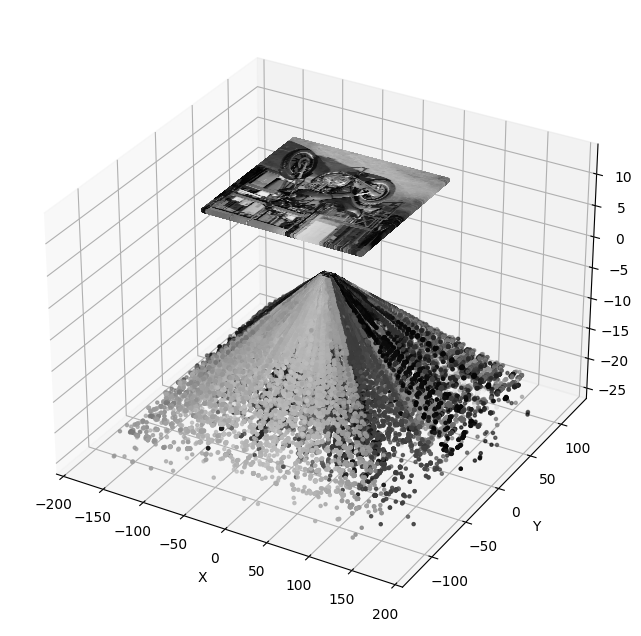

In [ ]:
# Plot and Save 3D Point Cloud
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, :, 0], points[:, :, 1], points[:, :, 2], c=colors.reshape(-1, 3) / 255.0, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig('3d_point_cloud.png')

# Show Plots
plt.show()